In [1]:
from clip2latent.models import Clip2StyleGAN
from PIL import Image
import torch

/home/jpinkney/miniconda3/envs/clip2latent/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = Clip2StyleGAN("best.yaml", device="cuda:7", checkpoint="best.ckpt")

In [3]:
def run(inp, idx=1, direction=None, scale=1):
    if direction is not None:
        edit = scale*direction
    else:
        edit=None
        
    with torch.no_grad():
        torch.manual_seed(idx)
        out = model(inp, skips=100, cond_scale=3, truncation=1, edit=edit)
    im = (0.5*out[0][0].permute(1,2,0).detach().cpu() + 0.5).clamp(0,1)
    im = (255*im).to(torch.uint8).numpy()

    im = Image.fromarray(im)
    return im

sampling loop time step: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.81it/s]

Setting up PyTorch plugin "bias_act_plugin"... 

Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


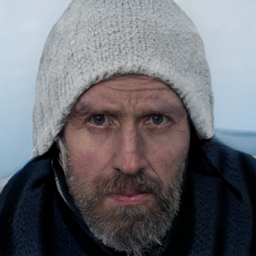

sampling loop time step: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.04it/s]


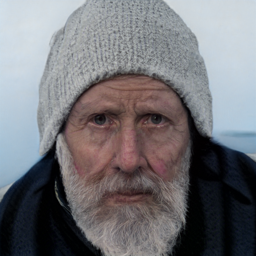

sampling loop time step: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.16it/s]


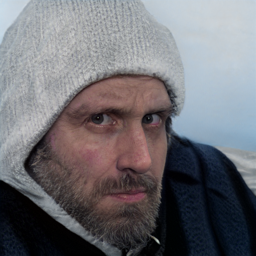

sampling loop time step: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.17it/s]


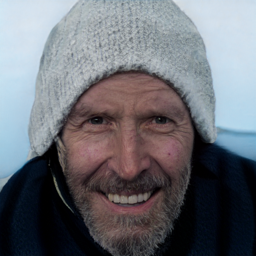

In [5]:
inp = "A photo of an arctic explorer"
edits = {
    None: 0,
    "age": 1.5,
    "pose": -3,
    "smile": 2,
}

for name, v in edits.items():
    if name:
        edit = torch.load(f"directions/{name}.pt")
    else:
        edit = None
    im = run(inp, 1, edit, v)
    display(im.resize((256, 256)))
    im.save(f"figures/{inp.replace(' ', '-')}-{name}-{v}.png")